# things needed to be done in order to get this project in hand
# remembering general code of important steps and their basic working 
# TIMESTAMP ANALYSIS CODE AND READING,timeseries view code for ploting graph
# why trying to change distribution to gaussian.
# how to interpret probplot

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xg
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
!pip install catboost
import catboost as ctb
from google.colab import files
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras import Sequential    # import Sequential from tensorflow.keras
from tensorflow.keras.layers import Dense,Dropout,Activation
from keras.callbacks import EarlyStopping

     |████████████████████████████████| 76.4 MB 25 kB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# CREATING NEW FEATURES FROM EXISTING BY DIVIDING ORIGINAL ONES, AND THEREBY REMOVING NOTDEFINED VALUES. ONEHOT ENCODING DATA. SPECIFICIALLY WORKING ON      TRAIN DATASET

In [7]:
df=pd.read_csv(r"/content/drive/MyDrive/DPHI ADVERTISEMENT DATASET(IIT GUWATI SUMMER ANALYTICS)/Train_Data.csv")
df['CTR'] = df['clicks'] / df['impressions']
df['CPC'] = df['cost'] / df['clicks']
df['CPA'] = df['cost'] / df['conversions']
#df['ROI'] = df['revenue'] / df['cost']
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df_infremoved=df.fillna(0)
#df_infremoved_encoded1=pd.get_dummies(df['ad']) 
df_infremoved_encoded2=pd.get_dummies(df['adgroup']) 
#result = pd.concat([df_infremoved,df_infremoved_encoded2,df_infremoved_encoded1], axis=1, join='inner')
#ad 71 = pd.Series(np.zeros(4571, dtype = float))
#ad 72=pd.Series(np.zeros(4571, dtype = float))
#ad 73=pd.Series(np.zeros(4571, dtype = float))
#ad 74=pd.Series(np.zeros(4571, dtype = float))
#ad 75=pd.Series(np.zeros(4571, dtype = float))
#result = pd.concat([df_infremoved,df_infremoved_encoded2,df_infremoved_encoded1,ad 71,ad 72,ad 73,ad 74,ad 75 ], axis=1, join='inner')
result_trn = pd.concat([df_infremoved,df_infremoved_encoded2 ], axis=1, join='inner')
result_trn=result_trn.drop([ 'campaign', 'ad','adgroup'], axis = 1)
result_trn_y=result_trn['revenue']
result_trn_x=result_trn.drop(['revenue'], axis = 1)
result_trn_y.head()

result_trn_x.describe()

,impressions,clicks,cost,conversions,CTR,CPC,CPA,adgroup 1,adgroup 2,adgroup 3,adgroup 4
count,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000
mean,92.635747,43.340844,2.800834,1.339094,0.439934,0.059030,0.556686,0.287464,0.159046,0.365784,0.187705
std,198.349737,100.164913,14.361618,5.223922,0.232061,0.135018,2.011103,0.452629,0.365759,0.481702,0.390519
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,0.040000,0.000000,0.333333,0.010610,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,7.000000,0.210000,0.000000,0.451389,0.015556,0.000000,0.000000,0.000000,0.000000,0.000000
75%,84.000000,38.000000,1.350000,1.000000,0.533333,0.055000,0.220000,1.000000,0.000000,1.000000,0.000000
max,3239.000000,1771.000000,531.250000,94.000000,2.000000,3.810000,57.450000,1.000000,1.000000,1.000000,1.000000


# CREATING NEW FEATURES FROM EXISTING BY DIVIDING ORIGINAL ONES, AND THEREBY REMOVING NOTDEFINED VALUES. ONEHOT ENCODING DATA. SPECIFICIALLY WORKING ON        TEST DATASET

In [8]:
df2=pd.read_csv(r"/content/drive/MyDrive/DPHI ADVERTISEMENT DATASET(IIT GUWATI SUMMER ANALYTICS)/Test_Data.csv")
df2['CTR'] = df2['clicks'] / df2['impressions']
df2['CPC'] = df2['cost'] / df2['clicks']
df2['CPA'] = df2['cost'] / df2['conversions']
#df2['ROI'] = df2['revenue'] / df2['cost']
df2.replace([np.inf, -np.inf], np.nan, inplace=True)
df_infremoved=df2.fillna(0)
#df_infremoved_encoded1=pd.get_dummies(df2['ad']) 
df_infremoved_encoded2=pd.get_dummies(df2['adgroup']) 
result_tst = pd.concat([df_infremoved,df_infremoved_encoded2], axis=1, join='inner')
result_tst=result_tst.drop(['campaign','ad','adgroup'],axis = 1)

       
      # ad 18, ad 19, ad 20, ad 21, ad 22, ad 23, 'ad 24',
      # 'ad 25', 'ad 26', 'ad 27', 'ad 28', 'ad 29', 'ad 30', 'ad 31',
      # 'ad 32', 'ad 33', 'ad 34', 'ad 35', 'ad 36', 'ad 37', 'ad 38', 'ad 39',
      #  'ad 40', 'ad 41', 'ad 42', 'ad 43', 'ad 44', 'ad 45', 'ad 46',
      # 'ad 47', 'ad 48', 'ad 49',  'ad 50', 'ad 51', 'ad 52', 'ad 53',
      # 'ad 54',  'ad 57', 'ad 58', 'ad 59',  'ad 60',
      # 'ad 61', 'ad 62', 'ad 63', 'ad 64', 'ad 65', 'ad 66', 'ad 67', 'ad 68',
      # 'ad 69',  'ad 70','ad 9'                               
result_tst.head()



,date,cost,impressions,clicks,conversions,CTR,CPC,CPA,adgroup 1,adgroup 2,adgroup 3,adgroup 4
0,01-03-2021,0.58,121,49,1,0.404959,0.011837,0.58,1,0,0,0
1,01-03-2021,0.17,22,12,0,0.545455,0.014167,0.00,0,0,1,0
2,01-03-2021,0.05,5,3,0,0.600000,0.016667,0.00,0,0,0,1
3,01-03-2021,0.01,2,1,0,0.500000,0.010000,0.00,0,1,0,0
4,01-03-2021,0.01,3,1,0,0.333333,0.010000,0.00,0,1,0,0


# DIVIDING DATA INTO TRAINING AND TEST SET USING    TRAIN_TEST_SPLIT. DROPING THE TARGET VARIABLE COLUMN AND   THEREBY GENERATING X_TRAIN,Y_TRAIN,X_TEST,Y_TEST

In [9]:
x=result_trn.drop(['revenue'], axis = 1)
#x=df.drop(['date'], axis = 1)
y=result_trn['revenue']
#x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25)
x.head()
z=result_tst
z.shape

(318, 12)

# Converting timestamp into day, month training dataset

In [10]:
result_trn_x["date"] = pd.to_datetime(result_trn_x["date"])

result_trn_x['Month'] = result_trn_x["date"].dt.month
result_trn_x['Day of the month'] = result_trn_x["date"].dt.day
result_trn_x['Year'] = result_trn_x["date"].dt.year

#result_trn_x = result_trn_x.drop(["date"], axis=1)
df_month_encoded2=pd.get_dummies(result_trn_x["Month"]) 
df_month_encoded3=pd.get_dummies(result_trn_x["Year"])
result_trn_x= pd.concat([result_trn_x,df_month_encoded2,df_month_encoded3 ], axis=1, join='inner')
result_trn_x=result_trn_x.sample(frac = 1)
#result_trn_x.sort_values()
result_trn_x.columns
#result_trn_x["Year"].value_counts()
#result_trn_x = result_trn_x.drop([ 1,2,3,4,5,6,7,8,9,10,11,12,2020,2021], axis=1)
result_trn_x.head()
#result_trn_x.columns

,date,impressions,clicks,cost,conversions,CTR,CPC,CPA,adgroup 1,adgroup 2,adgroup 3,adgroup 4,Month,Day of the month,Year,1,2,3,4,5,6,7,8,9,10,11,12,2020,2021
137,2020-07-08,48,23,0.26,1,0.479167,0.011304,0.26,1,0,0,0,7,8,2020,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4039,2021-05-02,38,17,0.70,0,0.447368,0.041176,0.00,0,0,1,0,5,2,2021,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1045,2020-01-10,15,7,0.73,0,0.466667,0.104286,0.00,0,0,1,0,1,10,2020,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1765,2020-05-11,11,5,0.53,0,0.454545,0.106000,0.00,0,0,1,0,5,11,2020,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4050,2021-05-02,1,0,0.00,0,0.000000,0.000000,0.00,0,0,0,1,5,2,2021,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [11]:
result_trn_x = result_trn_x.drop(["Year","Month",2020,"Day of the month"], axis=1)
#result_trn_x = result_trn_x.drop(['date'], axis=1)
result_trn_x.head()

,date,impressions,clicks,cost,conversions,CTR,CPC,CPA,adgroup 1,adgroup 2,adgroup 3,adgroup 4,1,2,3,4,5,6,7,8,9,10,11,12,2021
137,2020-07-08,48,23,0.26,1,0.479167,0.011304,0.26,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4039,2021-05-02,38,17,0.70,0,0.447368,0.041176,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1045,2020-01-10,15,7,0.73,0,0.466667,0.104286,0.00,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1765,2020-05-11,11,5,0.53,0,0.454545,0.106000,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4050,2021-05-02,1,0,0.00,0,0.000000,0.000000,0.00,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1


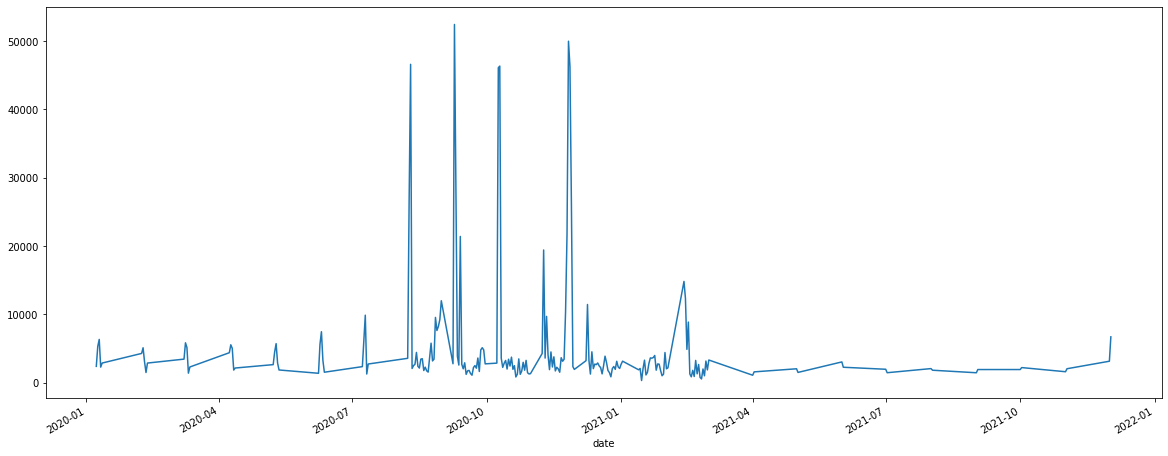

In [12]:
#Time series view
result_trn_with_revenue = pd.concat([result_trn_x,df.revenue ], axis=1, join='inner')
plt.figure(figsize=(20,8))
result_trn_with_revenue.groupby(["date"])["revenue"].sum().plot(kind='line')
plt.show()


# Converting timestamp into day, month testing data set

In [13]:
result_tst["date"] = pd.to_datetime(result_tst["date"])

result_tst['Month'] = result_tst["date"].dt.month
result_tst['Day of the month'] = result_tst["date"].dt.day
result_tst['Year'] = result_tst["date"].dt.year
df_month_encoded2=pd.get_dummies(result_tst["Month"])
df_year_encoded2=pd.get_dummies(result_tst["Year"])
result_tst = pd.concat([result_tst,df_month_encoded2,df_year_encoded2 ], axis=1, join='inner')
#result_tst=result_tst.sample(frac = 1)
#result_tst = result_tst.drop([1,2,3,4,5,6,7,8,9,10,11,12,2021], axis=1)
result_tst.head()

,date,cost,impressions,clicks,conversions,CTR,CPC,CPA,adgroup 1,adgroup 2,adgroup 3,adgroup 4,Month,Day of the month,Year,1,2,3,4,5,6,7,8,9,10,11,12,2021
0,2021-01-03,0.58,121,49,1,0.404959,0.011837,0.58,1,0,0,0,1,3,2021,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2021-01-03,0.17,22,12,0,0.545455,0.014167,0.00,0,0,1,0,1,3,2021,1,0,0,0,0,0,0,0,0,0,0,0,1
2,2021-01-03,0.05,5,3,0,0.600000,0.016667,0.00,0,0,0,1,1,3,2021,1,0,0,0,0,0,0,0,0,0,0,0,1
3,2021-01-03,0.01,2,1,0,0.500000,0.010000,0.00,0,1,0,0,1,3,2021,1,0,0,0,0,0,0,0,0,0,0,0,1
4,2021-01-03,0.01,3,1,0,0.333333,0.010000,0.00,0,1,0,0,1,3,2021,1,0,0,0,0,0,0,0,0,0,0,0,1


In [14]:
result_tst =result_tst.drop(["Year","Month","Day of the month","date"], axis=1)
result_tst.head()
result_trn_x = result_trn_x.drop(['date'], axis=1)
result_trn_x.head()

,impressions,clicks,cost,conversions,CTR,CPC,CPA,adgroup 1,adgroup 2,adgroup 3,adgroup 4,1,2,3,4,5,6,7,8,9,10,11,12,2021
137,48,23,0.26,1,0.479167,0.011304,0.26,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4039,38,17,0.70,0,0.447368,0.041176,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1045,15,7,0.73,0,0.466667,0.104286,0.00,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1765,11,5,0.53,0,0.454545,0.106000,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4050,1,0,0.00,0,0.000000,0.000000,0.00,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1


In [15]:
result_tst.head()


,cost,impressions,clicks,conversions,CTR,CPC,CPA,adgroup 1,adgroup 2,adgroup 3,adgroup 4,1,2,3,4,5,6,7,8,9,10,11,12,2021
0,0.58,121,49,1,0.404959,0.011837,0.58,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0.17,22,12,0,0.545455,0.014167,0.00,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,0.05,5,3,0,0.600000,0.016667,0.00,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0.01,2,1,0,0.500000,0.010000,0.00,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,0.01,3,1,0,0.333333,0.010000,0.00,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [16]:
result_trn_x.skew(axis = 0, skipna = True)

impressions     4.944993
clicks          6.108985
cost           18.786924
conversions    10.355685
CTR             0.600136
CPC            10.091079
CPA             9.813791
adgroup 1       0.939526
adgroup 2       1.865179
adgroup 3       0.557500
adgroup 4       1.600083
1               2.096647
2               2.454311
3               5.170515
4               4.942186
5               5.227200
6               5.208125
7               5.285540
8               2.663900
9               2.647825
10              2.300288
11              2.437069
12              2.041912
2021            0.845286
dtype: float64

In [17]:
lgr=LinearRegression()
#lgr.fit(x_train,y_train)
#y_pred1=lgr.predict(x_test)
#mean_squared_error(y_test,y_pred1)
#mean_absolute_error(y_test,y_pred1)
scores = -cross_val_score(lgr, x , y, cv=10, scoring='neg_mean_squared_error')
rmse=np.sqrt(scores)
rmse.mean()
#y_pred4=lgr.predict(z)
#y_pred[y_pred4<0]=0
#print(y_pred4)
#df3 = pd.DataFrame (y_pred1)
#res = pd.DataFrame(y_pred4)
#res.index = df2.index
#res.columns = ["revenue"]
#res.to_csv("prediction_results.csv", index = False)
#print(y_pred4.shape)
#lgr.get_params() 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: '25-08-2020'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: '01-08-2020'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: '01-08-2020'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit fai

nan

In [ ]:
HYPERPARAMETER TUNING BY USING RANDOM SEARCH CV FROM RANDOMFOREST REGRESSOR

In [ ]:
dfencode=pd.get_dummies(df, columns = ['adgroup', 'campaign'])
x=dfencode.drop(['revenue','date','ad'], axis = 1)
y=df['revenue']
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.30)
#x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25)
rfr=RandomForestRegressor()
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, n_iter = 300, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train, y_train)
#rf_random.best_params_
#scores=-cross_val_score(rfr,x,y,cv=10,scoring="neg_mean_squared_error")
#rmse=np.sqrt(scores)
#rmse.mean()

#dfencode1=pd.get_dummies(df2, columns = ['adgroup', 'campaign'])
#z=dfencode1.drop(['date','ad'], axis = 1)
#(x_train.head())
#rfr.fit(x_train,y_train)
#y_pred2=rfr.predict(z)
#res = pd.DataFrame(y_pred2)
#res.index = df2.index
#res.columns = ["revenue"]
#res.to_csv("second_revenue_predu.csv", index = False)
#print(y_pred4.shape)
#mean_absolute_error(y_test,y_pred2)
#mean_squared_error(y_test,y_pred2)
#print(y_pred2.shape)

In [ ]:
rf_random.best_params_

In [ ]:
rfr=RandomForestRegressor(bootstrap=False,
 max_depth = 110,
max_features = 'sqrt',
 min_samples_leaf=1,
 min_samples_split= 2,
 n_estimators= 100)
scores=-cross_val_score(rfr,result_trn_x,result_trn_y,cv=10,scoring="neg_mean_squared_error")
rmse=np.sqrt(scores)
rmse.mean()

In [ ]:
rfr=RandomForestRegressor()
#scores=-cross_val_score(rfr,x,y,cv=10,scoring="neg_mean_squared_error")
#rmse=np.sqrt(scores)
#rmse.mean()
#x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.20)
rfr.fit(result_trn_x,result_trn_y)
y_pred1=rfr.predict(z)
res = pd.DataFrame(y_pred1)
res.index = z.index # its important for comparison
res.columns = ["revenue"]
#res.to_csv("third_revenue_prediction.csv")
#files.download('third_revenue_prediction.csv')
rfr.get_params

In [ ]:
CBR = ctb.CatBoostRegressor()
#scores=-cross_val_score(CBR,result_trn_x,result_trn_y,cv=10,scoring="neg_mean_squared_error")
#rmse=np.sqrt(scores)
#rmse.mean()
CBR.fit(result_trn_x,result_trn_y)
y_pred_tst = CBR.predict(result_tst)
#res = pd.DataFrame(y_pred3)
#res.index = z.index # its important for comparison
#res.columns = ["revenue"]
#res.head()
#res.to_csv("fifth_revenue_prediction.csv")
#files.download('fifth_revenue_prediction.csv')

In [ ]:
revenueprediction = pd.DataFrame(y_pred_tst,columns=["Revenue"])
revenueprediction[revenueprediction["Revenue"]<0]=0
revenueprediction

In [ ]:
submissions= pd.DataFrame()
submissions['id'] =revenueprediction.index
submissions['revenue'] =revenueprediction
#submissions.to_csv(r"D:\KAGGLE COMPETITION DATASET AUG\fifth_revenue_prediction.csv", index = False)
submissions.to_csv('sixth_revenue_prediction.csv')         
#files.download('fifth_revenue_prediction.csv')
files.download('sixth_revenue_prediction.csv')

In [ ]:
#pip install keras_tuner 
from tensorflow.keras.optimizers import RMSprop 
import tensorflow as tf
from tensorflow import keras
!pip install -q -U keras-tuner
import keras_tuner as kt


def model_builder(hp):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.InputLayer(input_shape=(24,)))
  #first hidden layer
  model.add(tf.keras.layers.Dense(units = 512, activation = 'relu'))
  # Tune the number of units in the second Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value = 32, max_value = 512, step = 32)
  model.add(tf.keras.layers.Dense(units = hp_units, activation = 'relu'))
  model.add(tf.keras.layers.Dense(10))

  # Tune the learning rate for the optimizer 
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 
  
  model.compile(optimizer = Adam(learning_rate = hp_learning_rate),
                loss = 'mse', 
                metrics = ['mse'])
  
  return model
  
tuner = kt.RandomSearch(model_builder,
                        objective = 'mse', 
                        max_trials = 10,
                        directory = 'random_search_starter',
                        project_name = 'intro_to_kt') 
                     
tuner.search(result_trn_x,result_trn_y , epochs = 10, validation_split=0.2)

# Which was the best model?
best_model = tuner.get_best_models(1)[0]

# What were the best hyperparameters?
best_hyperparameters = tuner.get_best_hyperparameters(1)[0] 

In [ ]:
best_hyperparameters = tuner.get_best_hyperparameters
best_hyperparameters 

In [44]:

model = Sequential()
model.add(BatchNormalization(input_shape=(24,)))
model.add(Dense(512, input_dim=24, activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(1))

# compile the keras model
model.compile(loss='mse', optimizer='Adam', metrics=['mse'])

# separate the data
X_train, X_test, y_train, y_test = train_test_split(result_trn_x, result_trn_y, test_size=0.3, random_state=0)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2
# fit the keras model on the dataset
history = model.fit(X_train, y_train, epochs=150, batch_size=100,validation_split=0.2)

y_pred_tst=model.predict(result_tst)

Epoch 1/150
26/26 [==============================] - 2s 24ms/step - loss: 1449364.8750 - mse: 1449364.8750 - val_loss: 1302572.5000 - val_mse: 1302572.3750
Epoch 2/150
26/26 [==============================] - 0s 11ms/step - loss: 1447052.3750 - mse: 1447052.3750 - val_loss: 1301769.3750 - val_mse: 1301769.3750
Epoch 3/150
26/26 [==============================] - 0s 10ms/step - loss: 1443650.3750 - mse: 1443650.3750 - val_loss: 1301605.2500 - val_mse: 1301605.2500
Epoch 4/150
26/26 [==============================] - 0s 11ms/step - loss: 1442379.3750 - mse: 1442379.3750 - val_loss: 1301713.2500 - val_mse: 1301713.1250
Epoch 5/150
26/26 [==============================] - 0s 11ms/step - loss: 1437660.5000 - mse: 1437660.5000 - val_loss: 1300555.2500 - val_mse: 1300555.2500
Epoch 6/150
26/26 [==============================] - 0s 11ms/step - loss: 1435033.0000 - mse: 1435033.0000 - val_loss: 1299370.7500 - val_mse: 1299370.7500
Epoch 7/150
26/26 [==============================] - 0s 10ms/ste

In [46]:
history.history

{'loss': [1449364.875,
  1447052.375,
  1443650.375,
  1442379.375,
  1437660.5,
  1435033.0,
  1429668.0,
  1426431.375,
  1418763.5,
  1417232.125,
  1408929.125,
  1406837.375,
  1397706.125,
  1388938.875,
  1384865.25,
  1377983.125,
  1361042.5,
  1367760.625,
  1370823.75,
  1348087.25,
  1332450.0,
  1331179.0,
  1328391.125,
  1331684.125,
  1356997.25,
  1330499.625,
  1344014.5,
  1294927.75,
  1322557.625,
  1319496.75,
  1315204.5,
  1292635.25,
  1326815.25,
  1282146.0,
  1275510.125,
  1317923.625,
  1282394.375,
  1243776.125,
  1283676.375,
  1264486.125,
  1240814.625,
  1274629.0,
  1236190.625,
  1293486.0,
  1250866.5,
  1236915.125,
  1226322.875,
  1271691.125,
  1301792.125,
  1282472.125,
  1198669.375,
  1231286.875,
  1278189.25,
  1233295.0,
  1217334.5,
  1281127.125,
  1244447.5,
  1243082.125,
  1216122.25,
  1244565.625,
  1212893.75,
  1231983.875,
  1194275.25,
  1150945.125,
  1209947.375,
  1223729.125,
  1160548.125,
  1221809.25,
  1246966.75,
  1

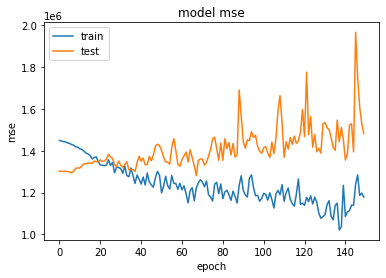

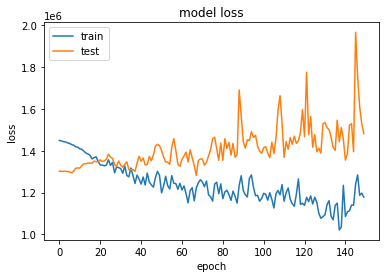

In [47]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [48]:
training_prediction = model.predict(result_trn_x)
revenueprediction = pd.DataFrame(training_prediction,columns=["Revenue"])
revenueprediction[revenueprediction["Revenue"]<0]=0
revenueprediction

,Revenue
0,28.561029
1,184.724518
2,74.502579
3,40.611259
4,314.418152
...,...
4566,93.708374
4567,289.779816
4568,80.206779
4569,57.544140


In [49]:
model.evaluate(X_test, y_test)
#mean_squared_error( result_trn_y,revenueprediction)

43/43 [==============================] - 0s 3ms/step - loss: 985230.0625 - mse: 985230.0625


[985230.0625, 985230.0625]

In [50]:
revenueprediction = pd.DataFrame(y_pred_tst,columns=["Revenue"])
revenueprediction[revenueprediction["Revenue"]<0]=0
revenueprediction

,Revenue
0,72.541115
1,296.180786
2,223.900223
3,99.320595
4,149.813782
...,...
313,260.871674
314,72.791695
315,70.197639
316,67.639236


In [ ]:
 from tensorflow.keras.optimizers import RMSprop 
import tensorflow as tf
from tensorflow import keras
!pip install -q -U keras-tuner
import keras_tuner as kt

def model_builder(hp):
  model = Sequential()
  model.add(Dense(512, input_dim=24, activation='relu'))
  hp_units = hp.Int('units', min_value = 32, max_value = 512, step = 32)
  model.add(Dense(units = hp_units, activation = 'relu'))
  #model.add(Dense(256, activation='relu'))
  #model.add(Dense(256, activation='relu'))
  model.add(Dense(units = hp_units, activation='relu'))
  model.add(Dense(1))
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-1, 1e-2, 1e-3, 1e-4]) # Tuning the learning rate (four different values to test: 0.1, 0.01, 0.001, 0.0001)
  optimizer = RMSprop(learning_rate = hp_learning_rate)                            # Defining the optimizer
  model.compile(loss='mse',metrics=['mse'], optimizer=optimizer)                   # Compiling the model 
  return model                                                                     # Returning the defined model

# 2. Define the hyperparameters grid to be validated
tuner_rs = kt.RandomSearch(
              model_builder,                # Takes hyperparameters (hp) and returns a Model instance
              objective = 'mse',            # Name of model metric to minimize or maximize
              seed = 42,                    # Random seed for replication purposes
              max_trials = 5,               # Total number of trials (model configurations) to test at most. Note that the oracle may interrupt the search before max_trial models have been tested.
              directory='random_search')    # Path to the working directory (relative).

# 3. Run the GridSearchCV process
tuner_rs.search(X_train, y_train, epochs=150, validation_split=0.2, verbose=1)

Trial 5 Complete [00h 01m 22s]
mse: 795686.9375

Best mse So Far: 795686.9375
Total elapsed time: 00h 06m 17s
INFO:tensorflow:Oracle triggered exit


In [52]:
submissions= pd.DataFrame()
submissions['id'] =revenueprediction.index
submissions['revenue'] =revenueprediction
#submissions.to_csv(r"D:\KAGGLE COMPETITION DATASET AUG\fifth_revenue_prediction.csv", index = False)
submissions.to_csv('ninth_revenue_prediction.csv')         
#files.download('fifth_revenue_prediction.csv')
files.download('ninth_revenue_prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))